In [2]:
import requests
import zipfile
import os

# URL do dataset
url = "https://github.com/roneysco/Fake.br-Corpus/archive/refs/heads/master.zip"
response = requests.get(url)

# Salvar o arquivo zip
with open("fakebr.zip", "wb") as file:
    file.write(response.content)

# Descompactar o arquivo
with zipfile.ZipFile("fakebr.zip", "r") as zip_ref:
    zip_ref.extractall("fakebr")

# Remover o arquivo zip
os.remove("fakebr.zip")

print("Download e extração do dataset concluídos.")


Download e extração do dataset concluídos.


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

print("Recursos do NLTK baixados.")

# Função para carregar os textos em um DataFrame
def load_texts(path, label):
    texts = []
    for file in os.listdir(path):
        with open(os.path.join(path, file), "r", encoding="utf-8") as f:
            texts.append(f.read())
    return pd.DataFrame({"text": texts, "label": label})

# Caminho para os arquivos de texto
fake_path = "fakebr/Fake.br-Corpus-master/full_texts/fake/"
real_path = "fakebr/Fake.br-Corpus-master/full_texts/true/"

# Carregar os textos falsos e reais
fake_df = load_texts(fake_path, "FAKE")
real_df = load_texts(real_path, "REAL")

# Concatenar os DataFrames
df = pd.concat([fake_df, real_df]).reset_index(drop=True)

print("Textos carregados e DataFrame criado.")

# Função para limpar o texto
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remover espaços duplicados
    text = text.strip()  # Remover espaços em branco no início e no fim
    return text

# Função para tokenizar e remover stopwords
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]  # Remover pontuações
    words = [word for word in words if word not in stop_words]  # Remover stopwords
    return ' '.join(words)

# Limpar e pré-processar os textos
df["text"] = df["text"].apply(clean_text).apply(preprocess_text)

print("Textos pré-processados.")


[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Recursos do NLTK baixados.
Textos carregados e DataFrame criado.
Textos pré-processados.


In [4]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df["label"])

print("Divisão dos dados em treino e teste concluída.")


Divisão dos dados em treino e teste concluída.


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Vetorizador TF-IDF com bigramas
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

# Rótulos
y_train = train_df["label"]
y_test = test_df["label"]

# Modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

print("Treinamento do modelo concluído.")


Acurácia: 96.18%
Treinamento do modelo concluído.


Imagens de máscara carregadas.


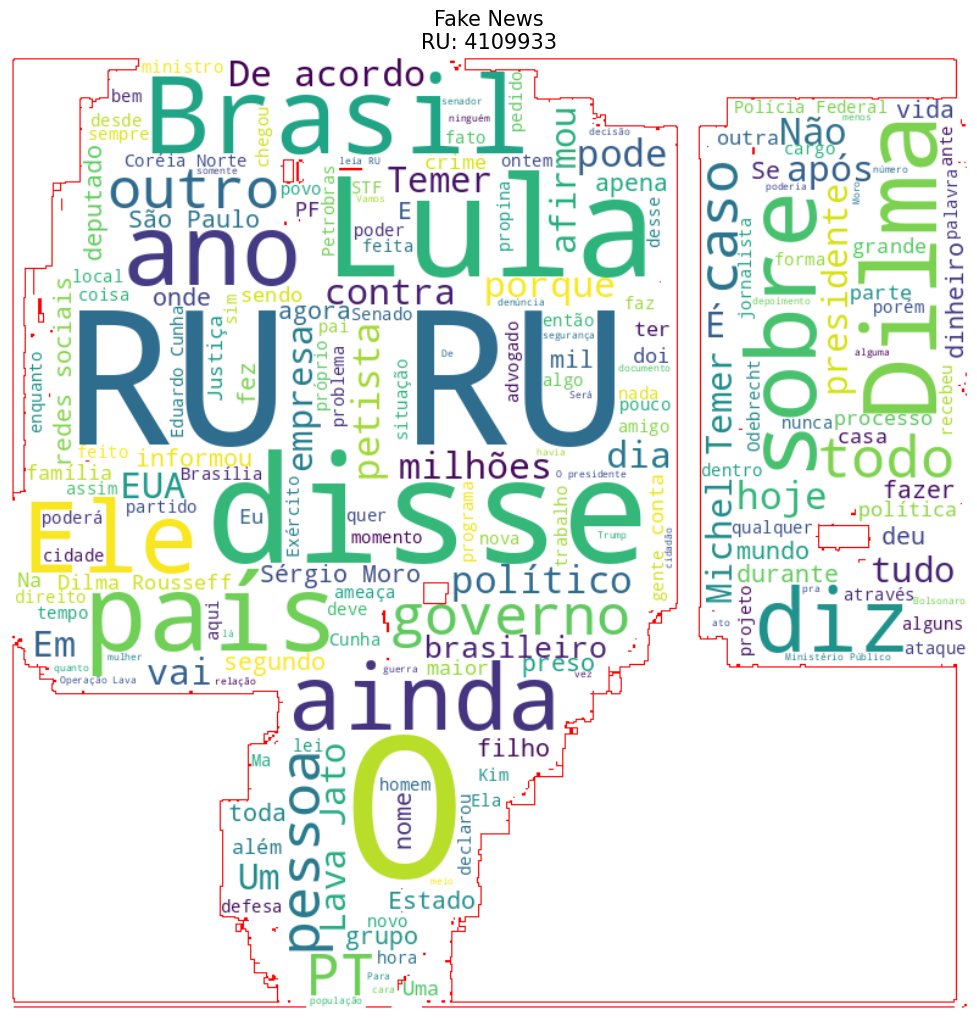

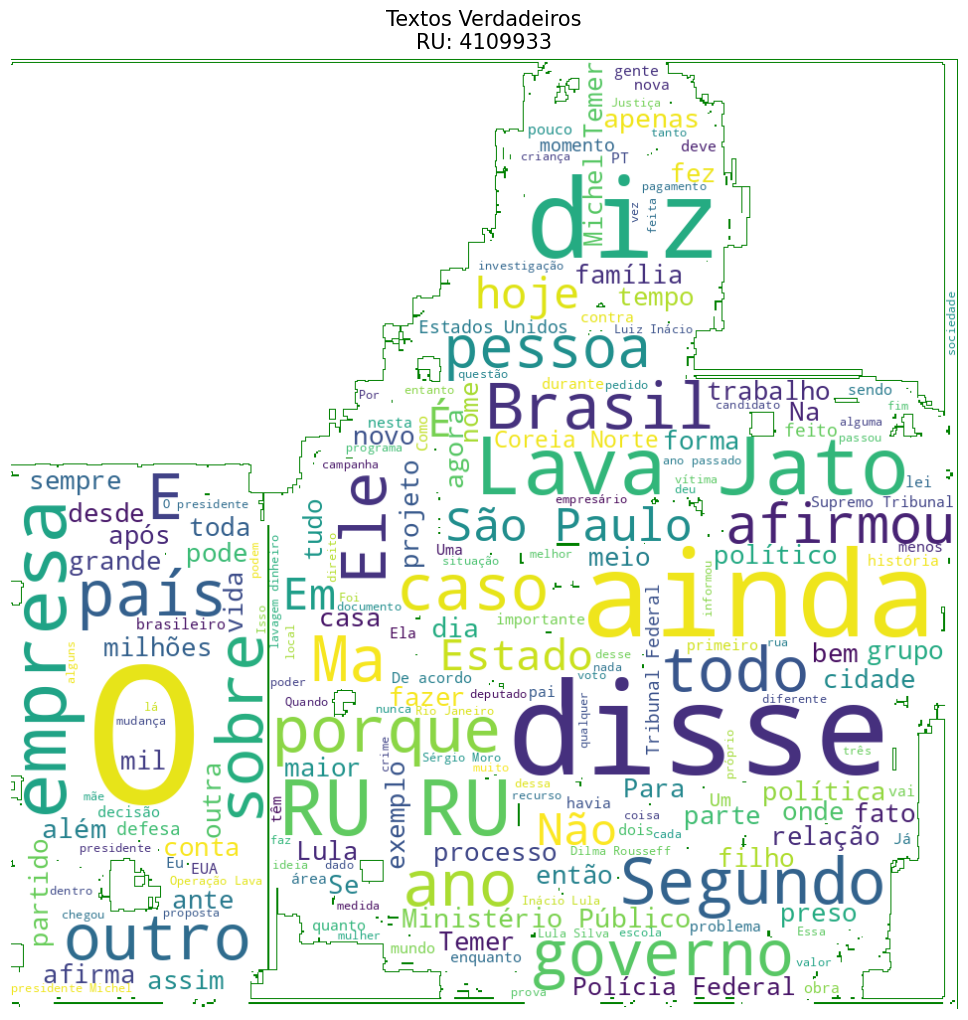

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Função para carregar a máscara de imagem
def load_mask_image(image_path):
    mask = np.array(Image.open(image_path))
    return mask

# Caminhos para as imagens de máscara
mask_image_path_fake = "/home/gustavo/Downloads/imagemfalsa.png"
mask_image_path_real = "/home/gustavo/Downloads/imagemverdadeira.png"

# Carregar as imagens de máscara
mask_fake = load_mask_image(mask_image_path_fake)
mask_real = load_mask_image(mask_image_path_real)

print("Imagens de máscara carregadas.")

# Textos de cada classe
fake_text = ' '.join(train_df[train_df["label"] == "FAKE"]["text"])
real_text = ' '.join(train_df[train_df["label"] == "REAL"]["text"])

# Sua matrícula
matricula = "RU: 4109933"

# Função para gerar a nuvem de palavras com a matrícula ao lado
def plot_wordcloud(text, mask, title, color, matricula):
    wordcloud = WordCloud(width=800, height=800, background_color='white', 
                          mask=mask, contour_width=1, contour_color=color).generate(text)
    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{title}\n{matricula}", fontsize=15)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Nuvens de palavras
plot_wordcloud(fake_text, mask_fake, "Fake News", 'red', matricula)
plot_wordcloud(real_text, mask_real, "Textos Verdadeiros", 'green', matricula)





